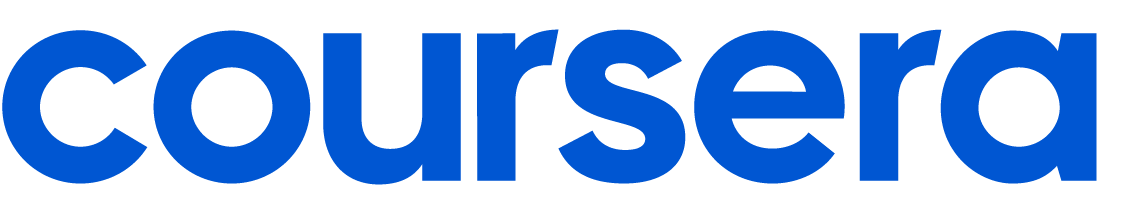

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages
!pip install -U xgboost
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
#cleaning the data
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [7]:
#Checking for duplicates
train_df.duplicated().sum()

0

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountAge,243787.0,60.083758,34.285143,1.000000,30.000000,60.000000,90.000000,119.000000
MonthlyCharges,243787.0,12.490695,4.327615,4.990062,8.738543,12.495555,16.238160,19.989957
TotalCharges,243787.0,750.741017,523.073273,4.991154,329.147027,649.878487,1089.317362,2378.723844
ViewingHoursPerWeek,243787.0,20.502179,11.243753,1.000065,10.763953,20.523116,30.219396,39.999723
AverageViewingDuration,243787.0,92.264061,50.505243,5.000547,48.382395,92.249992,135.908048,179.999275
ContentDownloadsPerMonth,243787.0,24.503513,14.421174,0.000000,12.000000,24.000000,37.000000,49.000000
UserRating,243787.0,3.002713,1.155259,1.000007,2.000853,3.002261,4.002157,4.999989
SupportTicketsPerMonth,243787.0,4.504186,2.872548,0.000000,2.000000,4.000000,7.000000,9.000000
WatchlistSize,243787.0,12.018508,7.193034,0.000000,6.000000,12.000000,18.000000,24.000000
Churn,243787.0,0.181232,0.385211,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
#Ordinal and Categorical Variables 
categorical = [var for var in train_df.columns if train_df[var].dtype=='O']
ordinal = [var for var in train_df.columns if train_df[var].dtype!='O']

print('There are {} Categorical variables'.format(len(categorical)))
print('There are {} Ordinal variables'.format(len(ordinal)))

There are 11 Categorical variables
There are 10 Ordinal variables


In [10]:
train_df['Churn'].value_counts()

0    199605
1     44182
Name: Churn, dtype: int64

Text(0, 0.5, 'The Count')

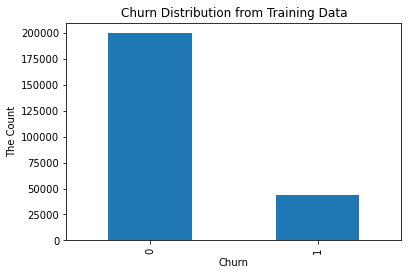

In [11]:
#Visualizing the data 
train_df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution from Training Data')
plt.xlabel('Churn')
plt.ylabel('The Count')

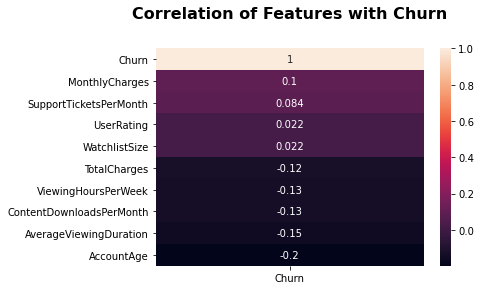

In [12]:
#Correlation Analysis 
sns.heatmap(train_df.corr()['Churn'].sort_values(ascending=False).to_frame(), annot=True)

plt.title('Correlation of Features with Churn', fontsize=16, fontweight='bold', pad=30)
plt.show()


In [13]:
train_df['MonthlyCharges'].min()

4.990061546582933

In [14]:
train_df['MonthlyCharges'].max()

19.989956867323198

In [15]:
train_df['SupportTicketsPerMonth'].min()

0

In [16]:
train_df['SupportTicketsPerMonth'].max()

9

In [17]:
def printUniqueValues(df):
    for col in df:
        if df[col].dtype == 'object':
            print(f'{col}: {df[col].unique()}')  # show unique values in each column train_df
        
printUniqueValues(train_df)

SubscriptionType: ['Premium' 'Basic' 'Standard']
PaymentMethod: ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling: ['No' 'Yes']
ContentType: ['Both' 'Movies' 'TV Shows']
MultiDeviceAccess: ['No' 'Yes']
DeviceRegistered: ['Mobile' 'Tablet' 'Computer' 'TV']
GenrePreference: ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Gender: ['Male' 'Female']
ParentalControl: ['No' 'Yes']
SubtitlesEnabled: ['No' 'Yes']
CustomerID: ['CB6SXPNVZA' 'S7R2G87O09' 'EASDC20BDT' ... '0H3SWWI7IU' '63SJ44RT4A'
 'A6IN701VRY']


In [18]:
ZeroChurn=train_df[train_df['Churn']==0]
OneChurn=train_df[train_df['Churn']==1]

In [19]:
ZeroChurn.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.000000,199605.0
mean,63.273290,12.286129,780.402245,21.182697,95.754533,25.383853,2.990688,4.390576,11.944941,0.0
std,33.953685,4.317675,524.200292,11.198072,50.281449,14.358435,1.155398,2.866237,7.197050,0.0
min,1.000000,4.990062,4.999861,1.000133,5.000547,0.000000,1.000039,0.000000,0.000000,0.0
25%,35.000000,8.532456,362.799813,11.601957,52.664521,13.000000,1.986598,2.000000,6.000000,0.0
50%,65.000000,12.189954,684.445761,21.545178,97.505261,26.000000,2.983423,4.000000,12.000000,0.0
75%,93.000000,15.993218,1124.699587,30.931229,139.403329,38.000000,3.989193,7.000000,18.000000,0.0
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999982,9.000000,24.000000,0.0


In [20]:
OneChurn.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.000000,44182.0
mean,45.674121,13.414880,616.737816,17.427741,76.494840,20.526323,3.057037,5.017451,12.350867,1.0
std,32.001262,4.251322,496.333924,10.932147,48.466716,14.028993,1.153083,2.844926,7.165535,0.0
min,1.000000,4.990112,4.991154,1.000065,5.002643,0.000000,1.000007,0.000000,0.000000,1.0
25%,18.000000,9.963733,218.502198,7.898715,34.398096,8.000000,2.065083,3.000000,6.000000,1.0
50%,40.000000,13.855745,488.927265,16.079108,69.772525,19.000000,3.084849,5.000000,13.000000,1.0
75%,69.000000,17.132808,903.552235,26.218169,114.371954,32.000000,4.057920,8.000000,19.000000,1.0
max,119.000000,19.989741,2356.614662,39.997750,179.991594,49.000000,4.999989,9.000000,24.000000,1.0


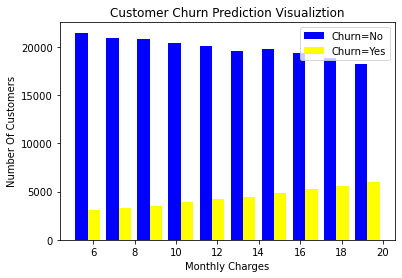

In [21]:
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([ZeroChurn.MonthlyCharges, OneChurn.MonthlyCharges], color = ['blue', 'yellow'], label = ['Churn=No', 'Churn=Yes'])
plt.legend();

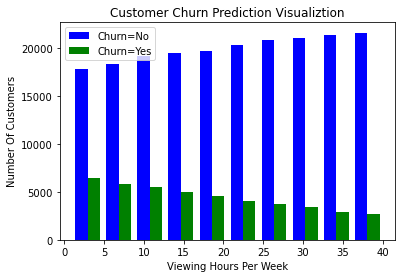

In [22]:
plt.xlabel("Viewing Hours Per Week")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([ZeroChurn.ViewingHoursPerWeek, OneChurn.ViewingHoursPerWeek], color=['blue', 'green'], label=['Churn=No', 'Churn=Yes'])
plt.legend();

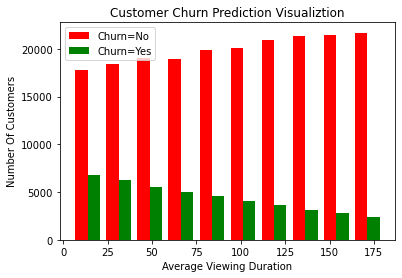

In [23]:
plt.xlabel("Average Viewing Duration")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([ZeroChurn.AverageViewingDuration, OneChurn.AverageViewingDuration], color=['red', 'green'], label=['Churn=No', 'Churn=Yes'])
plt.legend();

## Data Cleaning

In [24]:
# define yes or no column
yesNoColumns = ["PaperlessBilling", "MultiDeviceAccess", "ParentalControl", "SubtitlesEnabled"]
# define several columns for one hot encoding
columnsForOneHotEncoding = ["SubscriptionType", "PaymentMethod", "ContentType", "DeviceRegistered", "GenrePreference"]
# define the columbns to be scaled
columnsToScale = ["AccountAge","MonthlyCharges", "TotalCharges", "ViewingHoursPerWeek", "AverageViewingDuration", 
                  "ContentDownloadsPerMonth", "UserRating", "SupportTicketsPerMonth" ]

In [25]:
printUniqueValues(train_df)

SubscriptionType: ['Premium' 'Basic' 'Standard']
PaymentMethod: ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling: ['No' 'Yes']
ContentType: ['Both' 'Movies' 'TV Shows']
MultiDeviceAccess: ['No' 'Yes']
DeviceRegistered: ['Mobile' 'Tablet' 'Computer' 'TV']
GenrePreference: ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Gender: ['Male' 'Female']
ParentalControl: ['No' 'Yes']
SubtitlesEnabled: ['No' 'Yes']
CustomerID: ['CB6SXPNVZA' 'S7R2G87O09' 'EASDC20BDT' ... '0H3SWWI7IU' '63SJ44RT4A'
 'A6IN701VRY']


### Imbalanced Data 

In [26]:
len(ZeroChurn) , len(OneChurn) # seem to be imbalanced , yes churn is less than no churn

(199605, 44182)

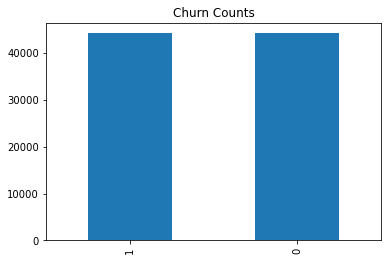

In [27]:
sampledNoChurn = ZeroChurn.sample(n=len(OneChurn), random_state=42)# random sample number of no churn = yes churn
sampledNoChurn.shape
TrainDF = pd.concat([sampledNoChurn, OneChurn], axis=0)
TrainDF.shape
#combine undersample no churn with yes churn  to make a balanced training data 
TrainDF["Churn"].value_counts().plot(kind='bar', title='Churn Counts');
#Random the ordering 
TrainDF = TrainDF.sample(frac=1).reset_index(drop=True)

In [28]:
TrainDF.head(20)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,107,6.905792,738.919766,Basic,Mailed check,Yes,TV Shows,Yes,Mobile,36.836512,...,5,Fantasy,3.132928,3,Female,15,Yes,No,Y37U9V54N6,0
1,59,7.470240,440.744157,Basic,Bank transfer,Yes,Both,No,Computer,12.354354,...,27,Drama,1.973915,3,Male,7,Yes,No,15TJ0DG7YZ,1
2,97,9.646906,935.749860,Basic,Mailed check,Yes,Both,Yes,TV,24.824537,...,49,Drama,4.600064,2,Female,16,No,No,3O961BQ2Y3,0
3,104,11.614242,1207.881212,Premium,Electronic check,No,TV Shows,Yes,Tablet,17.153538,...,45,Sci-Fi,1.006582,5,Female,21,No,Yes,ILBRWGJK25,0
4,23,11.610997,267.052925,Premium,Mailed check,Yes,Movies,Yes,Computer,9.449900,...,14,Fantasy,2.824351,9,Male,13,No,No,1SF887KZWD,0
5,29,8.349343,242.130949,Standard,Bank transfer,Yes,TV Shows,No,Mobile,38.896476,...,43,Fantasy,4.387084,1,Female,20,No,No,MKQ1D53UNX,1
6,13,12.604701,163.861111,Standard,Bank transfer,Yes,TV Shows,No,Mobile,7.015143,...,15,Drama,4.627452,4,Male,15,No,Yes,M6H1I96JZO,0
7,35,6.787009,237.545324,Standard,Credit card,Yes,TV Shows,No,TV,12.474038,...,24,Sci-Fi,4.170481,6,Male,15,No,Yes,XOUPY297HU,0
8,93,11.843999,1101.491947,Standard,Credit card,No,Both,No,TV,36.382818,...,45,Sci-Fi,2.216966,9,Male,17,Yes,No,3FUGTYGXX7,0
9,113,9.423006,1064.799686,Premium,Credit card,No,Both,No,Computer,4.608870,...,18,Sci-Fi,2.646394,6,Male,7,Yes,No,2YSEJUHB7Z,0


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def preprocessData(df, scale=True):

    # Convert Yes/No columns to 1/0
    for col in yesNoColumns:
        df[col].replace({'Yes': 1, 'No': 0}, inplace=True)
        
    # Convert gender to 1/0
    df.Gender.replace({"Male": 1, "Female": 0}, inplace=True)

    # One hot encoding
    df = pd.get_dummies(df, columns=columnsForOneHotEncoding, dtype=int)

    if scale:
        # Scale columns
        scaler = MinMaxScaler()#StandardScaler()
        df[columnsToScale] = scaler.fit_transform(df[columnsToScale])

    return df
    


In [30]:
balanceTrainDF = preprocessData(TrainDF)

In [31]:
balanceTrainDF.sample(5)

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
10539,0.686441,0.432123,0.395024,1,1,0.541143,0.737522,0.408163,0.742497,0.666667,...,0,0,1,0,0,0,0,0,0,1
65137,0.686441,0.622155,0.493699,1,1,0.357964,0.834373,0.306122,0.146385,0.111111,...,1,0,0,1,0,0,0,0,0,1
46512,0.177966,0.850175,0.162680,1,0,0.115537,0.507460,0.142857,0.917065,0.777778,...,1,0,1,0,0,0,0,0,1,0
86811,0.347458,0.095365,0.111737,1,1,0.347671,0.686517,0.346939,0.336822,0.777778,...,0,0,1,0,0,0,0,0,1,0
53365,0.296610,0.692627,0.231629,0,0,0.323552,0.883903,0.897959,0.038418,0.000000,...,0,1,0,0,0,1,0,0,0,0


In [32]:
test_df= preprocessData(test_df) # preprocss data for test set
test_df.sample(5)


,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
15304,0.762712,0.721676,0.604815,0,1,0.324346,0.616581,0.612245,0.108834,0.888889,...,1,0,0,0,1,0,1,0,0,0
6788,0.101695,0.721476,0.084571,0,0,0.081047,0.139073,0.795918,0.255323,0.666667,...,0,0,0,1,0,0,1,0,0,0
99773,0.432203,0.460826,0.258898,0,1,0.790144,0.897792,0.244898,0.797718,0.444444,...,0,0,0,1,0,0,0,0,1,0
100567,0.711864,0.929178,0.676369,0,0,0.263706,0.936943,0.387755,0.161588,0.111111,...,0,0,0,1,0,1,0,0,0,0
44428,0.932203,0.345786,0.474271,0,0,0.945304,0.098170,0.020408,0.755864,0.555556,...,0,0,0,0,1,1,0,0,0,0


In [33]:
# train_df.describe()
balanceTrainDF.describe()


,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
count,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,...,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000,88364.000000
mean,0.452716,0.524889,0.293093,0.500079,0.499525,0.469796,0.463487,0.468561,0.504589,0.522250,...,0.330146,0.251245,0.250928,0.245892,0.251935,0.193065,0.206000,0.198305,0.198327,0.204303
std,0.289105,0.287808,0.218293,0.500003,0.500003,0.287309,0.287710,0.293825,0.289157,0.319507,...,0.470268,0.433731,0.433550,0.430617,0.434127,0.394706,0.404433,0.398725,0.398742,0.403193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194915,0.280156,0.115459,0.000000,0.000000,0.218211,0.210575,0.204082,0.255012,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.432203,0.537784,0.246315,1.000000,0.000000,0.454755,0.445425,0.448980,0.506689,0.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.694915,0.775546,0.429843,1.000000,1.000000,0.713754,0.706420,0.714286,0.755581,0.777778,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
balanceTrainDF

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType_TV Shows,DeviceRegistered_Computer,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,0.898305,0.127715,0.309843,1,1,0.918912,0.924435,0.102041,0.533233,0.333333,...,1,0,1,0,0,0,0,0,1,0
1,0.491525,0.165346,0.183962,1,0,0.291145,0.696917,0.551020,0.243478,0.333333,...,0,1,0,0,0,0,0,1,0,0
2,0.813559,0.310461,0.392939,1,1,0.610903,0.266724,1.000000,0.900018,0.222222,...,0,0,0,1,0,0,0,1,0,0
3,0.872881,0.441620,0.507825,0,1,0.414205,0.295167,0.918367,0.001644,0.555556,...,1,0,0,0,1,0,0,0,0,1
4,0.186441,0.441403,0.110635,1,1,0.216669,0.690903,0.285714,0.456088,1.000000,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88359,0.550847,0.360143,0.287451,1,0,0.456847,0.918159,0.000000,0.322177,0.000000,...,0,0,0,1,0,0,1,0,0,0
88360,0.576271,0.456946,0.342910,1,0,0.459128,0.490334,0.306122,0.207825,0.000000,...,1,0,1,0,0,1,0,0,0,0
88361,0.474576,0.550991,0.316852,1,1,0.179838,0.681616,0.265306,0.307468,0.777778,...,0,0,0,0,1,0,0,0,0,1
88362,0.432203,0.016541,0.112887,1,1,0.361102,0.233672,1.000000,0.752826,0.777778,...,1,1,0,0,0,1,0,0,0,0


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

# Model



In [35]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf

In [36]:

X_train = balanceTrainDF.drop(['CustomerID','Churn'], axis=1)
y_train = balanceTrainDF['Churn']
X_test = test_df.drop(['CustomerID'], axis=1)

In [37]:
categorical_columns = X_train.select_dtypes(include=['object', 'string']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
def create_uncompiled_model():
    model = Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
# Set the learning rate

    learning_rate = 2e-6
# Set the optimizer
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    

    ### START CODE HERE
    
   # Reset states generated by Keras

#tf.keras.backend.clear_session,

        
 


    
    ### END CODE HERE

    return model

In [41]:
def adjust_learning_rate(dataset):
    
    model = create_uncompiled_model()
    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))
    
    ### START CODE HERE
    
    # Select your optimizer
    
    optimizer = 'adam'
    
    # Compile the model passing in the appropriate loss
    model.compile(loss='huber',
                  optimizer=optimizer, 
                  metrics=["mae"]) 
    
    ### END CODE HERE
    
    history = model.fit(X_train,y_train, epochs=100, callbacks=[lr_schedule])
    
    return history

In [42]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(X_train)

Epoch 1/100
2762/2762 [==============================] - 6s 2ms/step - loss: 0.1178 - mae: 0.4698 - lr: 1.0000e-04
Epoch 2/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1045 - mae: 0.4192 - lr: 1.1220e-04
Epoch 3/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1028 - mae: 0.4095 - lr: 1.2589e-04
Epoch 4/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1022 - mae: 0.4077 - lr: 1.4125e-04
Epoch 5/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1018 - mae: 0.4061 - lr: 1.5849e-04
Epoch 6/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1016 - mae: 0.4061 - lr: 1.7783e-04
Epoch 7/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1014 - mae: 0.4052 - lr: 1.9953e-04
Epoch 8/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1013 - mae: 0.4049 - lr: 2.2387e-04
Epoch 9/100
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1

(0.0001, 10.0, 0.0, 10.0)

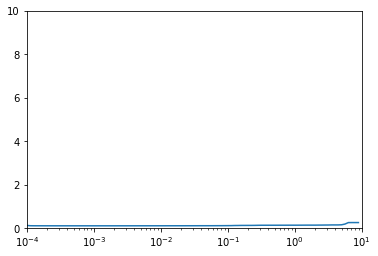

In [43]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 10])

## Compiling the model
Now that you have trained the model while varying the learning rate, it is time to do the actual training that will be used to forecast the time series. For this complete the create_model function below.

In [44]:
def create_model():

    
    model = create_uncompiled_model()

    ### START CODE HERE

    model.compile(loss='huber',
                  optimizer='adam',
                  metrics=["mae"])  
    

    ### END CODE HERE

    return model

In [47]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(X_train,y_train, epochs=50)

Epoch 1/50
2762/2762 [==============================] - 6s 2ms/step - loss: 0.1045 - mae: 0.4149
Epoch 2/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1019 - mae: 0.4065
Epoch 3/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1016 - mae: 0.4056
Epoch 4/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1014 - mae: 0.4051
Epoch 5/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1012 - mae: 0.4044
Epoch 6/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1011 - mae: 0.4038
Epoch 7/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1009 - mae: 0.4031
Epoch 8/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1008 - mae: 0.4028
Epoch 9/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1007 - mae: 0.4024
Epoch 10/50
2762/2762 [==============================] - 5s 2ms/step - loss: 0.1006 - mae: 0.4017
Epoch 11/50
2762/2762 [======

In [48]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = model.predict(X_test)[:, 0]

3265/3265 [==============================] - 3s 992us/step


In [49]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [50]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(100)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.199713
1,LFR4X92X8H,0.130330
2,QM5GBIYODA,0.669314
3,D9RXTK2K9F,0.160183
4,ENTCCHR1LR,0.436625
...,...,...
95,QSU00UH993,0.129727
96,MZD1UYXRGO,0.361019
97,KD2UP46SL4,0.080708
98,YC28YZLPHZ,0.344267


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [51]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [52]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [53]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [54]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [55]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!